# Electric Load Forecasting

## Problem Statement
<p>
    Electrical energy is central to our quality of life and a lot of our daily tasks virtually depend on it.
Energy providers are under constant pressure to provide high quality services, without delay or failure, 24/7 and all for an affordable price.<br>
So, how does an energy provider determine supply based on demand?
How do they handle the challenge of everyone suddenly working from home using up more electric energy than was originally predicted?<br>
How do they meet the demand caused during extreme weather conditions without running out of supply or catastrophic failure?<br>
Keeping in mind all the fixed price contracts that need to be honored with customers, energy management today has a crucial need for innovative, dynamic, smart and artificially intelligent load management to keep things running smoothly.</p>
<p>
    Load forecasting is a technique used by energy providers to predict the energy needed to meet the demand and supply equilibrium. It is important because it is used to develop effective long and short term strategies, control energy usage, develop building electrical guidelines, fault detection, and developing reliable budget forecasts when dealing with a growing population and the global climate change crisis.</p>
<p>
    We will use machine learning regression models to perform load forecasting of each commercial building type and determine the electrical patterns for each building type. This can assist in identifying irregular electrical patterns and create building type energy profiles. This information can be usefule in determining grid areas that may need maintenance or inspection, and can provide building type energy usage guidelines.</p>

## Data Acquisition
We obtained this dataset from the <a target="blank" href="https://data.openei.org/about">Open Energy Data Initiative (OEDI) Data Lake</a> which is a centralized repository of datasets aggregated from the U.S. Department of Energy’s programs, offices and national labs.<br>
Our dataset is focused on commercial building energy data for Atlanta, GA and Chicago, IL which are two of the largest commercial energy data locations from the OEDI data lake datasets. The dataset contains 16 different commercial building types.<br>

## Data Dictionary
We combined 32 different datasets, 1 for each building type in each city to yield a combined structured dataset with a total of 280,320 records.<br>
We will combine the total electricity and gas usage columns to define our target, and use the building type, location and date/time columns as our features.<br>
<p>Here is a snapshot of our data dictionary, dataset info and head:</p>

|                        Original Column Name 	| New Column Name                         	| Data Type   	| Description                                       	|
|--------------------------------------------:	|-----------------------------------------	|-------------	|---------------------------------------------------	|
| Date/Time                                   	| date_time                               	| Datetime    	| Date/time electricity and gas usage, was recorded 	|
| Electricity:Facility \[kW](Hourly)          	| electricity_facility_kw_hourly          	| Float       	| Total electricity usage in kilowatt-hours         	|
| Fans:Electricity \[kW](Hourly)              	| fans_electricity_kw_hourly              	| Float       	| Fan electricity usage                             	|
| Cooling:Electricity \[kW](Hourly)           	| cooling_electricity_kw_hourly           	| Float       	| Cooling electricity usage                         	|
| Heating:Electricity \[kW](Hourly)           	| heating_electricity_kw_hourly           	| Float       	| Heating electricity usage                         	|
| InteriorLights:Electricity \[kW](Hourly)    	| interiorlights_electricity_kw_hourly    	| Float       	| Interior lights electricity usage                 	|
| InteriorEquipment:Electricity \[kW](Hourly) 	| interiorequipment_electricity_kw_hourly 	| Float       	| Interior equipment electricity usage              	|
| Gas:Facility \[kW](Hourly)                  	| gas_facility_kw_hourly                  	| Float       	| Total gas usage in kilowatt-hours                 	|
| Heating:Gas \[kW](Hourly)                   	| heating_gas_kw_hourly                   	| Float       	| Heating gas usage                                 	|
| InteriorEquipment:Gas \[kW](Hourly)         	| interiorequipment_gas_kw_hourly         	| Float       	| Interior equipment gas usage                      	|
| Water Heater:WaterSystems:Gas \[kW](Hourly) 	| water_heater_watersystems_gas_kw_hourly 	| Float       	| Water heater gas usage                            	|
| building_type                               	| building_type                           	| Categorical 	| Building type                                     	|
| location                                    	| location                                	| Categorical 	| Location (City, state)                            	|
| Electricity:Facility \[kW](Monthly)         	| electricity_facility_kw_monthly         	| Float       	| Total monthly electricity usage (kilowatt-hours)  	|
| Gas:Facility \[kW](Monthly)                 	| gas_facility_kw_monthly                 	| Float       	| Total monthly gas usage (kilowatt-hours)          	|

In [1]:
# Imports
import glob
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Global Variables
data_path = '../data/raw/'
substrings_to_remove = [data_path.replace('raw/', 'raw'), '\\', 'RefBldg', '.csv']

# Functions
def get_building_type(filename):
    return re.sub(r'New2004.+', '', filename)

def get_location(filename):
    return re.sub(r'^.*USA_', '', filename)

def get_all_csv_filenames(path):
    return glob.glob(path + "*.csv")

def build_dataframe(filenames):
    building_energy_profiles_list = []
    for filepath in filenames:
        df = pd.read_csv(filepath)
        df['building_type'] = get_building_type(clean_filename(filepath))
        df['location'] = get_location(clean_filename(filepath))
        building_energy_profiles_list.append(df)
    df = pd.DataFrame()
    df = pd.concat(building_energy_profiles_list)
    return df

def clean_filename(filename):
    for substring_to_remove in substrings_to_remove:
        filename = filename.replace(substring_to_remove, '')
    return filename

In [75]:
df = build_dataframe(get_all_csv_filenames(data_path))
df.info() # Shows the rows count and the types
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280320 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Date/Time                                   280320 non-null  object 
 1   Electricity:Facility [kW](Hourly)           280320 non-null  float64
 2   Fans:Electricity [kW](Hourly)               280320 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            280320 non-null  float64
 4   Heating:Electricity [kW](Hourly)            280320 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     280320 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  280320 non-null  float64
 7   Gas:Facility [kW](Hourly)                   280320 non-null  float64
 8   Heating:Gas [kW](Hourly)                    280320 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          157680 non-null  float64
 10

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.84623,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.00000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.00000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN


In [62]:
df.describe() # Shows the main statistics for every numerical column in the dataset

,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
count,280320.000000,280320.000000,280320.000000,280320.000000,280320.000000,280320.000000,280320.000000,280320.000000,157680.000000,227760.000000,0.0,0.0
mean,210.709809,17.097175,63.040030,0.997331,40.998511,53.206147,93.651569,65.445966,18.062637,22.209686,NaN,NaN
std,338.065744,27.027562,146.873691,6.992196,74.966386,83.204969,198.002912,177.263681,21.452361,61.556407,NaN,NaN
min,1.925019,0.000000,0.000000,0.000000,0.275003,1.011600,0.000000,0.000000,0.000000,0.020000,NaN,NaN
25%,25.920466,0.609296,0.000000,0.000000,3.788942,8.089532,2.188668,0.000000,3.205680,0.453090,NaN,NaN
50%,65.426770,4.901633,0.975674,0.000000,15.863942,20.643869,15.218752,0.000000,8.330300,3.231799,NaN,NaN
75%,225.571819,25.735840,29.992698,0.000000,43.513342,53.238744,83.984321,46.732087,25.049100,12.991516,NaN,NaN
max,1849.288314,280.393352,855.720598,273.640426,448.566544,448.566544,3928.617729,3923.763469,91.799800,663.480658,NaN,NaN


## Data Cleaning
### 1. Dropping unnecessary columns
The following columns have no values
<ol>
    <li>Electricity:Facility [kW](Monthly)</li>
    <li>Gas:Facility [kW](Monthly)</li>
</ol>

In [70]:
cols_to_remove = ["Electricity:Facility [kW](Monthly)", "Gas:Facility [kW](Monthly)"]
df.drop(cols_to_remove, inplace=True, axis=1)
df.head()

KeyError: "['Electricity:Facility [kW](Monthly)' 'Gas:Facility [kW](Monthly)'] not found in axis"

### 2. Standardize data
- Convert all data to lower case
- Remove white spaces around the string
- Replace spaces with underscores
- Standardize column titles
    - Replace spaces, \](, /, and : with underscores
    - Remove \[, \)

In [76]:
# Standardize columns
df.columns = df.columns.str.lower()
mapping = [ (' ', '_'), ('[', ''), (']\(', '_'), ('\)', '') , ('/', '_'), (':', '_')]
for k, v in mapping:
    df.columns = df.columns.str.replace(k, v)

df.head()

,date_time,electricity_facility_kw_hourly,fans_electricity_kw_hourly,cooling_electricity_kw_hourly,heating_electricity_kw_hourly,interiorlights_electricity_kw_hourly,interiorequipment_electricity_kw_hourly,gas_facility_kw_hourly,heating_gas_kw_hourly,interiorequipment_gas_kw_hourly,water_heater_watersystems_gas_kw_hourly,building_type,location,electricity_facility_kw_monthly,gas_facility_kw_monthly
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.84623,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.00000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.00000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN


In [86]:
# df['date_time'] = df['date_time'].str.strip()
df['date_time_2'] = pd.to_datetime(df['date_time'].str.strip(), format='%m/%d %H:%M:%S', error='coerce')
df.head()

TypeError: to_datetime() got an unexpected keyword argument 'error'

In [64]:
# Convert data to lower case & trim white spaces around strings
df = df.applymap(lambda x: x.lower().strip() if type(x)==str else x)

# Replace spaces in data with underscores
df.replace('\s+', '_', regex=True, inplace=True)

# Standardize columns    
mapping = [ (' ', '_'), ('[', ''), (']\(', '_'), ('\)', '') , ('/', '_'), (':', '_')]
for k, v in mapping:
    df.columns = df.columns.str.replace(k, v)

df.head()

,Date_Time,Electricity_Facility_kW_Hourly,Fans_Electricity_kW_Hourly,Cooling_Electricity_kW_Hourly,Heating_Electricity_kW_Hourly,InteriorLights_Electricity_kW_Hourly,InteriorEquipment_Electricity_kW_Hourly,Gas_Facility_kW_Hourly,Heating_Gas_kW_Hourly,InteriorEquipment_Gas_kW_Hourly,Water_Heater_WaterSystems_Gas_kW_Hourly,building_type,location
0,01/01_01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.84623,3.33988,6.350099,fullservicerestaurant,ga_atlanta
1,01/01_02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,fullservicerestaurant,ga_atlanta
2,01/01_03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.00000,3.33988,0.592073,fullservicerestaurant,ga_atlanta
3,01/01_04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,fullservicerestaurant,ga_atlanta
4,01/01_05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.00000,3.33988,0.592079,fullservicerestaurant,ga_atlanta


## 3. Missing Data
Here we generate a list of missing data % for each feature.

In [44]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Date/Time - 0.0%
Electricity:Facility [kW](Hourly) - 0.0%
Fans:Electricity [kW](Hourly) - 0.0%
Cooling:Electricity [kW](Hourly) - 0.0%
Heating:Electricity [kW](Hourly) - 0.0%
InteriorLights:Electricity [kW](Hourly) - 0.0%
InteriorEquipment:Electricity [kW](Hourly) - 0.0%
Gas:Facility [kW](Hourly) - 0.0%
Heating:Gas [kW](Hourly) - 0.0%
InteriorEquipment:Gas [kW](Hourly) - 44.0%
Water Heater:WaterSystems:Gas [kW](Hourly) - 19.0%
building_type - 0.0%
location - 0.0%


In [45]:
df.isnull().sum(axis=0)

Date/Time                                          0
Electricity:Facility [kW](Hourly)                  0
Fans:Electricity [kW](Hourly)                      0
Cooling:Electricity [kW](Hourly)                   0
Heating:Electricity [kW](Hourly)                   0
InteriorLights:Electricity [kW](Hourly)            0
InteriorEquipment:Electricity [kW](Hourly)         0
Gas:Facility [kW](Hourly)                          0
Heating:Gas [kW](Hourly)                           0
InteriorEquipment:Gas [kW](Hourly)            122640
Water Heater:WaterSystems:Gas [kW](Hourly)     52560
building_type                                      0
location                                           0
dtype: int64

In [46]:
df['building_type'].value_counts()

fullservicerestaurant     17520
largehotel                17520
hospital                  17520
stand-aloneretail         17520
supermarket               17520
smalloffice               17520
warehouse                 17520
quickservicerestaurant    17520
primaryschool             17520
stripmall                 17520
secondaryschool           17520
mediumoffice              17520
midriseapartment          17520
smallhotel                17520
largeoffice               17520
outpatient                17520
Name: building_type, dtype: int64

In [47]:
df['location'].value_counts()

ga_atlanta          140160
il_chicago-ohare    140160
Name: location, dtype: int64

In [49]:
df_temp = df[['location', 'building_type']]
df_temp.head()

,location,building_type
0,ga_atlanta,fullservicerestaurant
1,ga_atlanta,fullservicerestaurant
2,ga_atlanta,fullservicerestaurant
3,ga_atlanta,fullservicerestaurant
4,ga_atlanta,fullservicerestaurant


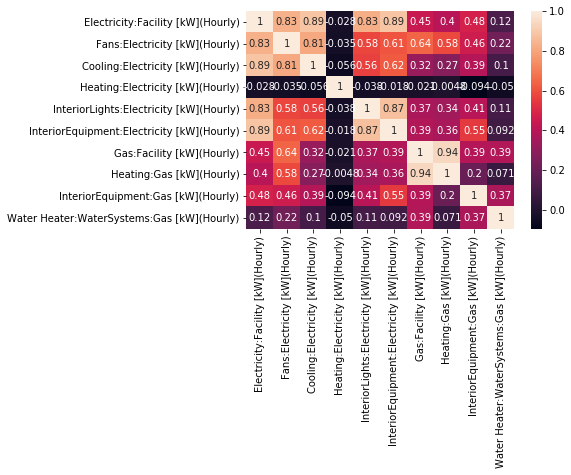

In [17]:
corrMatrix = energy_profiles_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()